../../yolo-testing/datasets/night_only_Canada_v2/images/train/FILE210409-231035F_3892.jpg ../../yolo-testing/datasets/night_only_Canada_v2/labels/train/FILE210409-231035F_3892.txt


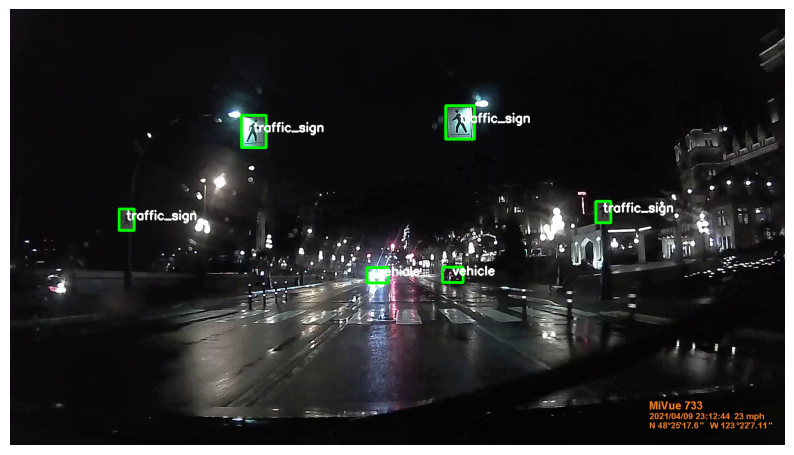

In [15]:
import random
import glob
import os

from utils import draw_yolo_bboxes

dataset_path = "../../yolo-testing/datasets/night_only_Canada_v2"

id2cls = {1: 'vehicle', 2: 'person', 3: 'bus', 4: 'minibus', 5: 'truck', 6: 'traffic_sign', 7: 'motorbike', 8: 'glare'}

# Example usage
img_path = random.sample(glob.glob(f"{dataset_path}/images/train/*.jpg"), 1)[0]
image_name = os.path.basename(img_path)[:-4]
label_path = f"{dataset_path}/labels/train/{image_name}.txt"

print(img_path, label_path)
draw_yolo_bboxes(img_path, label_path, 1920, 1080, id2cls)